<a href="https://colab.research.google.com/github/Oluwabukunmige/My-Machine-Learning-Journey/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification Problem

In [0]:
!pip install PyDrive

In [0]:
import pydrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1DQbdKbHq922I9xIWQh58Udtz6W0MN9Jq'})
download.GetContentFile('loan.csv')

In [0]:
import pandas as pd
loan = pd.read_csv('loan.csv')

In [0]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Preprocess the dataset

In [0]:
final_loan = loan.copy()
final_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [0]:
final_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [0]:
final_loan['credit.policy'].value_counts(dropna = False)

1    7710
0    1868
Name: credit.policy, dtype: int64

In [0]:
final_loan['purpose'].value_counts(dropna = False)

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## Logistic Regression

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:

numeric_features = ['credit.policy','int.rate',
                    'installment','log.annual.inc','dti','fico',
                    'days.with.cr.line','revol.bal','revol.util',
                    'inq.last.6mths','delinq.2yrs','pub.rec']

numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

In [0]:
categorical_features = ['purpose']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [0]:
target_count = final_loan['not.fully.paid'].value_counts(dropna = False)
target_count

0    8045
1    1533
Name: not.fully.paid, dtype: int64

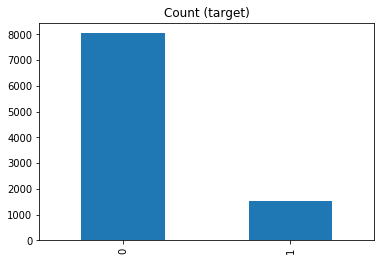

In [0]:
target_count.plot(kind='bar', title='Count (target)')

In [0]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [0]:
smt = SMOTE(random_state=42,ratio = 'minority')
lor = LogisticRegression(C = 100)


In [0]:
clf = Pipeline([('preprocessor', preprocessor),('smt', smt),
                ('lor',lor)])

In [0]:
y = final_loan['not.fully.paid']
X = final_loan.drop('not.fully.paid', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50 )

In [0]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('poly',
                                                                   PolynomialFeatures(degree=2,
                                                                                      include_bias=True,
                                                                                      interaction_only=False,
                                                                                      order='C')),
                                                                  ('scaler',
                                                                   Sta

In [0]:
clf.score(X_train, y_train)

0.6384519003202005

In [0]:
clf.score(X_test, y_test)

0.6125260960334029

## Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [0]:
clf_train = clf.predict(X_train)
clf_predicted = clf.predict(X_test)

In [0]:
#clf_predicted

In [0]:
confusion = confusion_matrix(y_test, clf_predicted)
confusion

array([[1247,  785],
       [ 143,  220]])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf_predicted, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73      2032
           1       0.22      0.61      0.32       363

    accuracy                           0.61      2395
   macro avg       0.56      0.61      0.53      2395
weighted avg       0.79      0.61      0.67      2395



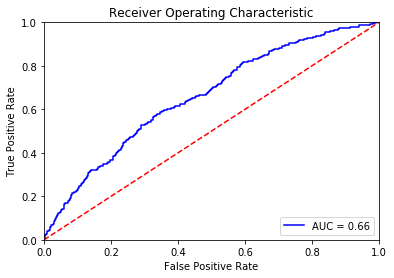

In [0]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)

preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()